# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [0]:
!pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

### Importe o dataset

In [5]:
data_frame = pd.read_csv(r'C:\Users\LMMARTINHO\OneDrive - Tereos\Área de Trabalho\Courses\Statistics\Parte 4 - Correlação e Regressão\aula-5-inicio\aula-5-inicio\dados_projeto.csv', delimiter = ';')

### Visualize o conteúdo do DataFrame

In [6]:
data_frame.head()

## Y: consumo médio de cerveja (L)
## X: Temperatura

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


### Obtenha e avalie as estatísticas descritivas dos dados

In [7]:
data_frame.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

<Axes: xlabel='X'>

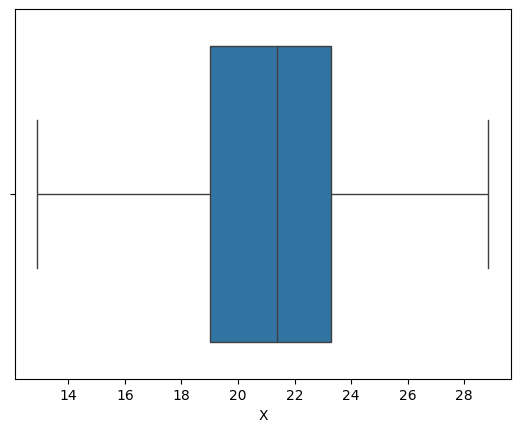

In [11]:
sns.boxplot(data_frame['X'], orient = 'h')

<Axes: xlabel='Y'>

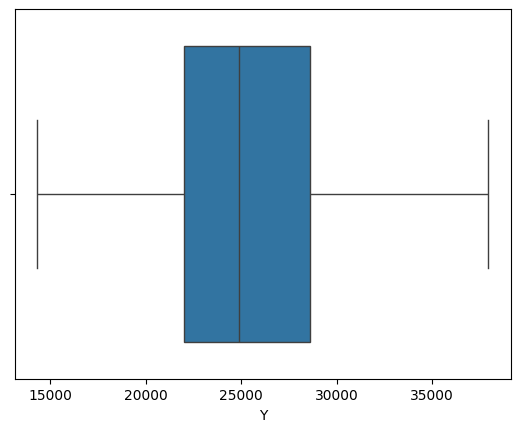

In [12]:
sns.boxplot(data_frame['Y'], orient = 'h')

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

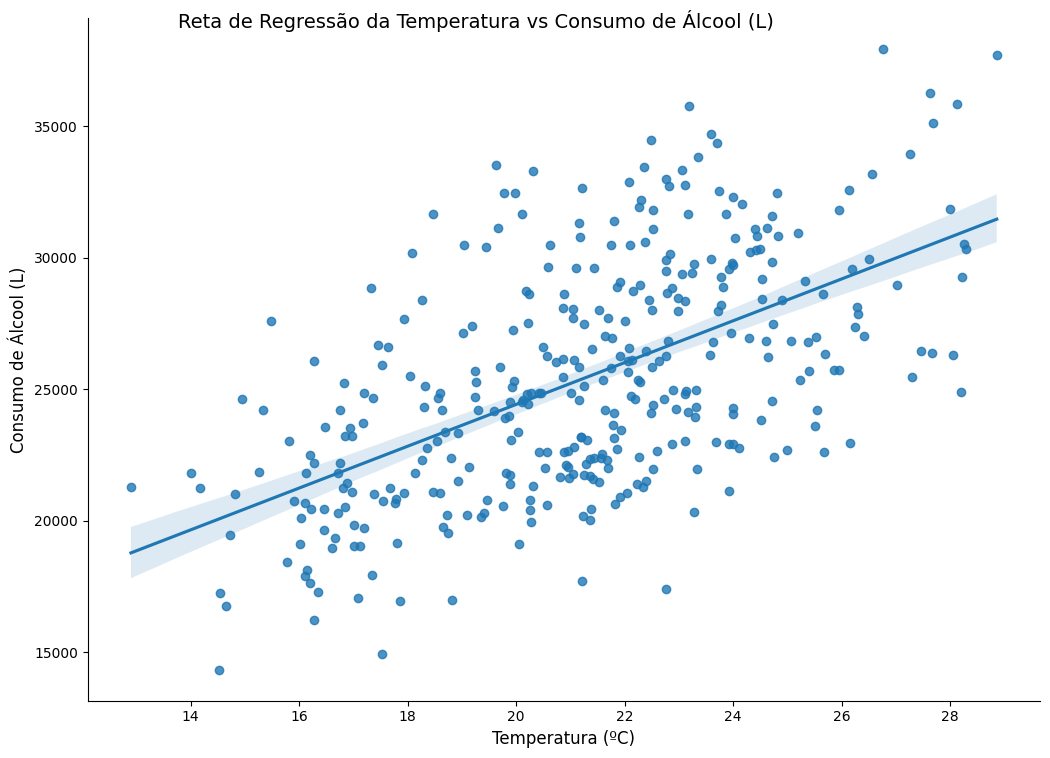

In [22]:
teste = sns.lmplot(data=data_frame, x = 'X', y= 'Y')
teste.figure.set_size_inches(12,8)
teste.figure.suptitle('Reta de Regressão da Temperatura vs Consumo de Álcool (L)', size = 14)
teste.set_xlabels('Temperatura (ºC)', size = 12)
teste.set_ylabels('Consumo de Álcool (L)', size = 12)

### <font color='red'>Utilizando a matriz de correlação</font>

In [23]:
data_frame.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim

É possível quantificar a intensidade dessa relação?

Resp.: Sim, tem uma intensidade mediana

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não, apenas um relação quase linear

### Prepare os dados para estimar um modelo de regressão linear simples

In [25]:
Y = data_frame['Y']
X = sm.add_constant(data_frame['X'])

In [26]:
Y.head()

0    25461
1    28972
2    30814
3    29799
4    28900
Name: Y, dtype: int64

In [27]:
X.head()

,const,X
0,1.0,27.30
1,1.0,27.02
2,1.0,24.82
3,1.0,23.98
4,1.0,23.82


### Estime o modelo de regressão linear simples

In [28]:
resultado_regressao = sm.OLS(Y,X).fit()

### Visualize o resultado da regressão

In [30]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           1.87e-33
Time:                        17:53:43   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [31]:
data_frame['Y Previsto'] = resultado_regressao.predict()

In [32]:
data_frame.head()

,Y,X,Y Previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [35]:
consumo_42 = resultado_regressao.predict([1,42])
print(consumo_42)

[41913.97383817]


### Obtenha os resíduos da regressão

In [36]:
data_frame['Resíduos'] = data_frame['Y Previsto'] - data_frame['Y']
data_frame.head()

,Y,X,Y Previsto,Resíduos
0,25461,27.30,30229.200544,4768.200544
1,28972,27.02,30006.633434,1034.633434
2,30814,24.82,28257.891852,-2556.108148
3,29799,23.98,27590.190521,-2208.809479
4,28900,23.82,27463.009315,-1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

In [0]:
data_frame.

### Obtenha o QQPlot dos resíduos

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$